# Assignment 4
## 122CS0067 Amiya Chowdhury
Q1. Resize an image with varying scaling factors (e.g., 0.1x, 0.2x, 0.5x, 1.2x, 2.5x) using OpenCV. Evaluate the visual quality of the resized image and compare it with the original image.

Dynamic Assignment: Do it for a set of images in a folder and save the scaled images into an output folder.

In [5]:
import cv2
import os
import matplotlib.pyplot as plt
import time

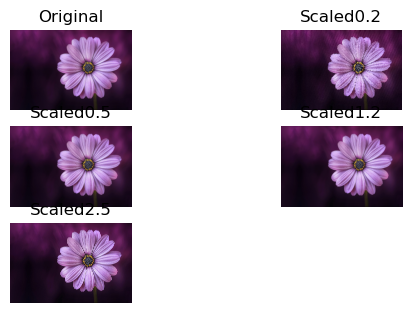

In [34]:
img_path=r'C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\flower.jpg'
img=cv2.imread(img_path)
scales=[0.2,0.5,1.2,2.5]

plt.subplot(len(scales),2,1)
plt.title(f"Original")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')


for i in range(len(scales)):
    temp=cv2.resize(img,None,fx=scales[i],fy=scales[i],interpolation=cv2.INTER_LINEAR)
    plt.subplot(len(scales),2,i+2)
    plt.title(f"Scaled{scales[i]}")
    plt.imshow(cv2.cvtColor(temp,cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
plt.show()



    

Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\5_0.1x.png
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\5_0.4x.png
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\5_0.5x.png
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\5_1.2x.png
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\5_2.5x.png
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\flower_0.1x.png
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\flower_0.4x.png
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\flower_0.5x.png
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\flower_1.2x.png
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\flower_2.5x.png
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\leaf_0.1x.png
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\leaf_0.4x.png
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\leaf_0.5x.png
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\leaf_1.2x.png
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled

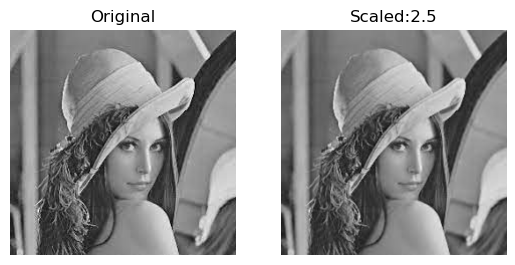

In [42]:
def resize_images(input_folder,output_folder,scales):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for img in os.listdir(input_folder):
        img_path=os.path.join(input_folder,img)
        img_dat=cv2.imread(img_path)
        
        if img_dat is None:
            continue
        for scale in scales:
            resized_img=cv2.resize(img_dat,None,fx=scale,fy=scale,interpolation=cv2.INTER_LINEAR)
            o_path=os.path.join(output_folder,f"{os.path.splitext(img)[0]}_{scale}x.png")
            cv2.imwrite(o_path,resized_img)
            print(f"Saved:{o_path}")
            
            
            plt.subplot(1,2,1)
            plt.title(f"Original")
            plt.imshow(cv2.cvtColor(img_dat,cv2.COLOR_BGR2RGB))
            plt.axis('off')
           
            plt.subplot(1,2,2)
            plt.title(f"Scaled:{scale}")
            plt.imshow(cv2.cvtColor(resized_img,cv2.COLOR_BGR2RGB))
            plt.axis('off')

input_folder= r"C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data"
output_folder = r"C:\Users\Admin\Desktop\122cs0067_CV\data\scaled"
scales=[0.1,0.4,0.5,1.2,2.5]
resize_images(input_folder,output_folder,scales)

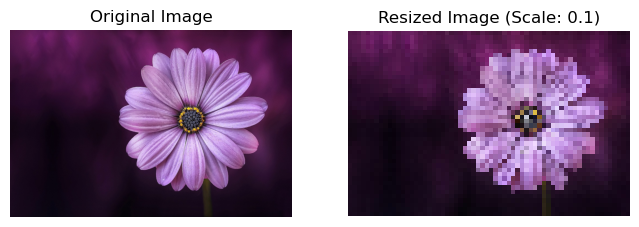

Q2. Resize an image using different interpolation methods (e.g., cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4). Measure and compare the processing time for each method.

Dynamic Assignment: Do it for a set of images in a folder and save the interpolated images into an output folder.

In [53]:
itp_methods=[(cv2.INTER_NEAREST,"INTER_NEAREST"),(cv2.INTER_LINEAR,"INTER_LINEAR"),(cv2.INTER_CUBIC,"INTER_CUBIC"),(cv2.INTER_LANCZOS4,"INTER_LANCZOS4")]
def resize_methods(image_path,output_path,itp_methods):
    
    img=cv2.imread(image_path)
    
    for method,name in itp_methods:
        t1=time.time()
        resized=cv2.resize(img,None,fx=1.5,fy=1.5,interpolation=method)
        t2=time.time()
        print(f"Interpolation Method: {name}, Processing Time: {t2-t1} seconds")
        o_path=os.path.join(output_folder,f"_{name}.png")
        cv2.imwrite(o_path,resized)
        print(f"Saved:{o_path}")
        
image_path=r'C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\5_0.4x.png'
output_path=r'C:\Users\Admin\Desktop\122cs0067_CV\data\scaled'
resize_methods(image_path,output_path,itp_methods)
        

Interpolation Method: INTER_NEAREST, Processing Time: 0.0 seconds
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\_INTER_NEAREST.png
Interpolation Method: INTER_LINEAR, Processing Time: 0.0 seconds
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\_INTER_LINEAR.png
Interpolation Method: INTER_CUBIC, Processing Time: 0.0 seconds
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\_INTER_CUBIC.png
Interpolation Method: INTER_LANCZOS4, Processing Time: 0.0 seconds
Saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\_INTER_LANCZOS4.png


Q3. Resize images with and without preserving the aspect ratio. Evaluate the visual differences between the two sets of scaled images and analyze how aspect ratio preservation affects the overall perception.

Text(0.5, 1.0, 'Aspect ratio preserved')

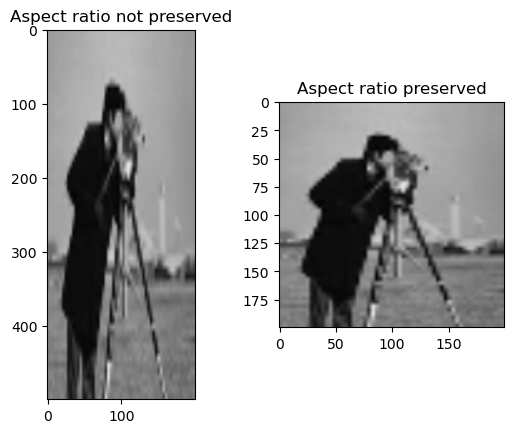

In [69]:
image_path=r'C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\5_0.4x.png'
img=cv2.imread(image_path)
h,w=img.shape[:2]

aspect_killed=cv2.resize(img,(200,500))
plt.subplot(1,2,1)
plt.imshow(aspect_killed)
plt.title("Aspect ratio not preserved")

t= int(200*h/w)
aspect_pre=cv2.resize(img,(200,t))
plt.subplot(1,2,2)
plt.imshow(aspect_pre)
plt.title("Aspect ratio preserved")




Q4. Rotate a given image at different angles (e.g., 30 degrees, 60 degrees, 90 degrees) using OpenCV. Assess the visual quality and potential loss of information. Compare the results to determine the optimal rotation angle for minimal distortion.

Dynamic Assignment: Do it for a set of images in a folder and save the rotated images into an output folder.

In [56]:
def rotate_image(image_name,,output_folder,rotation_angles):
    input_image=cv2.imread(image_name)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        
    for angle in rotation_angles:
        height,width=input_image.shape[:2]
        rotation_matrix= cv2.getRotationMatrix2D((width/2,height/2),angle,scale=1.0)
        rotated_image=cv2.warpAffine(input_image,rotation_matrix,(width,height))
        
        output_path=os.path.join(output_folder,f"{os.path.splitext(image_name)[0]}_{angle}.jpg")
        cv2.imwrite(output_path,rotated_image)
        print(f"Image saved:{output_path}")

        
image_path=r'C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\5_0.4x.png'
output_path=r'C:\Users\Admin\Desktop\122cs0067_CV\data\scaled'
rotate_image(image_path,output_path,[45,90,120,180])

Image saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\5_0.4x_45.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\5_0.4x_90.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\5_0.4x_120.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\5_0.4x_180.jpg


In [59]:
def batch_rotate(input_folder,output_folder,angles):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for img in os.listdir(input_folder):
        img_path=os.path.join(input_folder,img)
        img_dat=cv2.imread(img_path)
        
        if img_dat is None:
            continue
        rotate_image(img_path,output_folder,angles)
        

input_folder=r'C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data'
output_folder=r'C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\rotate'
batch_rotate(input_folder,output_folder,[0,45,60,120])

Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\5_0.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\5_45.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\5_60.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\5_120.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\flower_0.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\flower_45.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\flower_60.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\flower_120.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\leaf_0.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\leaf_45.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\leaf_60.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\leaf_120.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\lena_0.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\lena_45.jpg
Image saved

Q5. Develop a Python program using OpenCV that allows users to input a rotation angle interactively. Rotate the image in real-time based on user input, providing immediate visual feedback.

Dynamic Assignment: Do it for a set of images in a folder and save the rotated images into an output folder.

Enter angle of rotation:24


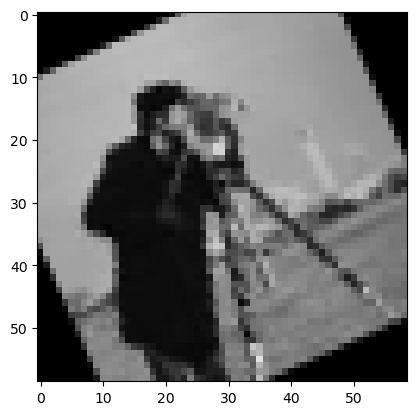

In [72]:
def rotate_image_int(image_name,angle):
    input_image=cv2.imread(image_name)
    height,width=input_image.shape[:2]
    rotation_matrix= cv2.getRotationMatrix2D((width/2,height/2),angle,scale=1.0)
    rotated_image=cv2.warpAffine(input_image,rotation_matrix,(width,height))
    plt.imshow(rotated_image)

angle=int(input("Enter angle of rotation:"))        
image_path=r'C:\Users\Admin\Desktop\122cs0067_CV\data\scaled\5_0.4x.png'
rotate_image_int(image_path,angle)

Q6. Create a batch processing script that rotates a set of images at varying angles using OpenCV. Measure the processing time and compare it with rotating each image individually.

In [61]:
def rotate_image_timed(image_name,img,output_folder,rotation_angles):
    input_image=cv2.imread(image_name)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    t1=time.time()
    for angle in rotation_angles:
        height,width=input_image.shape[:2]
        rotation_matrix= cv2.getRotationMatrix2D((width/2,height/2),angle,scale=1.0)
        rotated_image=cv2.warpAffine(input_image,rotation_matrix,(width,height))
        
        output_path=os.path.join(output_folder,f"{os.path.splitext(img)[0]}_{angle}.jpg")
        cv2.imwrite(output_path,rotated_image)
        print(f"Image saved:{output_path}")
    t2=time.time()
    print(f"Processing time for image:{t2-t1}seconds")
        
def batch_rotate_timed(input_folder,output_folder,angles):
    t1=time.time()
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for img in os.listdir(input_folder):
        img_path=os.path.join(input_folder,img)
        img_dat=cv2.imread(img_path)
        
        if img_dat is None:
            continue
        rotate_image_timed(img_path,img,output_folder,angles)
    t2=time.time()
    print(f"Total processing time :{t2-t1}seconds")

input_folder=r'C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data'
output_folder=r'C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\rotate'
angles=[40,45,90,180,190]
batch_rotate_timed(input_folder,output_folder,angles)

    

Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\rotate\5_40.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\rotate\5_45.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\rotate\5_90.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\rotate\5_180.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\rotate\5_190.jpg
Processing time for image:0.0seconds
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\rotate\5_0_40.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\rotate\5_0_45.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\rotate\5_0_90.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\rotate\5_0_180.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\rotate\5_0_190.jpg
Processing time for image:0.031248092651367188seconds
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\rotate\5_120_40.jpg
Image saved:C:\Users\Admin\Desktop\122cs0067_CV\Lab-4\data\rotate\